# Zertifikatskurs Forschungsdatenmanagement
## Modul 4 -  Hacken & experimentieren mit Daten (14.11.2022 - 16.12.2022)

### Aufgabe 3 - Python, Teil 2


**Aufgabenbeschreibung:** 
Seattle Library - Datenanalyse



In [31]:
# import necessary libraries
import urllib.request
import pandas as pd

In [32]:
# fetch data from source and sav ase csv file
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x16d76ec4f70>)

In [33]:
# create data frame
checkouts_df = pd.read_csv(checkout_file)

# print data_frame to inspect data if necessary 
# checkouts_df

#### Fragestellung 1: 
Gibt alle E-Books, die ausgeliehen wurden aus und schreibe sie in eine Excel-Datei. Dabei soll die Indexspalte nicht ausgegeben werden.

In [34]:
# Define output file

output_file = "checkout_ebooks_only.xlsx"

# Select rows with material type = EBOOK
checkouts_ebooks_df = checkouts_df[checkouts_df["materialtype"] == "EBOOK"]

# use ExcelWriter to write file without index column
writer = pd.ExcelWriter(output_file)
checkouts_ebooks_df.to_excel(writer, index=False)
writer.save()

print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


#### Fragestellung 2: 
Gib eine Tabelle der Medien aus, die in einem beliebigen Monat häufiger als 100 mal ausgeliehen wurden. Sortiere die Tabelle absteigend nach Häufigkeit der Ausleihen.

In [35]:
checkouts_many = checkouts_df[checkouts_df["checkouts"]>=100]
checkouts_many.sort_values(by=['checkouts'], ascending=False)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
6638,Physical,Horizon,BOOK,2018,1,540,In the midst of winter : a novel / Isabel Alle...,NaN,"Allende, Isabel","College teachers Fiction, Women college teache...","Atria Books,",2017.
9700,Physical,Horizon,BOOK,2018,1,495,Her body and other parties : stories / Carmen ...,NaN,"Machado, Carmen Maria","Women Fiction, Psychological fiction, Science ...","Graywolf Press,",[2017]
9255,Digital,Zinio,MAGAZINE,2018,1,354,The Economist,NaN,NaN,NaN,NaN,NaN
7785,Physical,Horizon,VIDEODISC,2018,1,176,Hidden figures / 20th Century Fox ; Fox 2000 P...,NaN,NaN,United States National Aeronautics and Space A...,"Twentieth Century Fox Home Entertainment,",[2017]
6084,Physical,Horizon,BOOK,2018,1,114,George & Lizzie : a novel / Nancy Pearl.,NaN,"Pearl, Nancy","Married people Fiction, Domestic fiction","Touchstone,",2017.
3056,Digital,OverDrive,AUDIOBOOK,2018,1,106,The Underground Railroad (Oprah's Book Club): ...,NaN,Colson Whitehead,"Fiction, Historical Fiction, Literature",Books on Tape,2016
2170,Physical,Horizon,VIDEODISC,2018,1,105,Ghostbusters / Columbia Pictures ; in associat...,NaN,NaN,"Supernatural Drama, Parapsychology Drama, Feat...","Sony Pictures Home Entertainment,",[2016]


### Fragestellung 3: Summiere die Ausleihzahlen nach Materialtyp auf und gib es als Chart aus (im PDF).


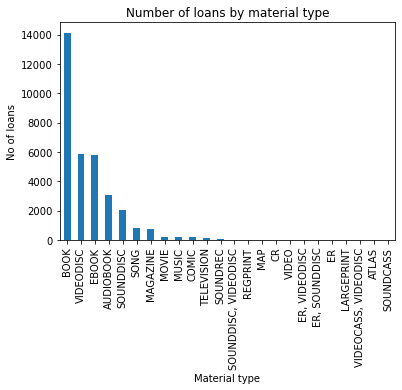

In [36]:
checkouts_df.groupby("materialtype").checkouts.sum()
checkout_sum_by_mattype = checkouts_df.groupby("materialtype").checkouts.sum().sort_values(ascending=False)
figure = checkout_sum_by_mattype.plot.bar(title = "Number of loans by material type", ylabel="No of loans", xlabel="Material type")
figure.get_figure().savefig("no_of_loans_by_materialtype.pdf")